# New York vs. China Air Pollution

For this project, I'm going to find the four days in New York over the past four years with the highest air pollution, and see how these compare to the worst four days over past four years in Beijing, and then the city in China with the worst air-pollution.

# Data Cleaning

I accessed archived data on air quality for New York and Beijing from The World Air Quality Project, which takes its data from Chinese and US government bureaus. 

The index we will be look at is the level of pm2.5, a fine particle emitted through exhaust fumes and linked to an icnrease in respiratory and cardiovascular diseases when breathed in over a long period of time. 

In [1]:
import pandas as pd

In [6]:
# Read it in with skiprows=1 to skip the first one (although your method works, too)
# and parse_dates to automatically date-ize the first column
# na_values to say 'empty spaces should be ignored'
df_beijing = pd.read_csv('beijing-air-quality.csv',
                         skiprows=1,
                         parse_dates=['date'],
                         na_values=' ')
df_beijing

,date,pm25,pm10,o3,no2,so2,co
0,2023-06-02,105.0,30.0,53.0,5.0,NaN,1.0
1,2023-06-03,34.0,28.0,76.0,11.0,NaN,2.0
2,2023-06-04,41.0,26.0,65.0,10.0,NaN,2.0
3,2023-06-05,40.0,53.0,96.0,11.0,1.0,3.0
4,2023-06-06,74.0,29.0,71.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...
3447,2019-01-01,NaN,46.0,17.0,20.0,5.0,9.0
3448,2017-09-11,NaN,23.0,35.0,19.0,1.0,3.0
3449,2015-01-01,NaN,67.0,19.0,29.0,16.0,11.0
3450,2014-01-01,NaN,85.0,20.0,30.0,14.0,20.0


In [13]:
df_recent = df_beijing[df_beijing['date'] > '2020-01-01'].copy()

In [14]:
df_recent.sort_values(by = 'pm25', ascending = False).head(20)

,date,pm25,pm10,o3,no2,so2,co
881,2021-03-16,301.0,142.0,29.0,10.0,NaN,3.0
850,2021-02-13,273.0,132.0,13.0,21.0,2.0,22.0
1219,2020-02-14,261.0,NaN,26.0,7.0,NaN,8.0
851,2021-02-14,259.0,133.0,35.0,12.0,NaN,13.0
1218,2020-02-13,253.0,NaN,17.0,27.0,1.0,21.0
1193,2020-01-19,251.0,58.0,28.0,10.0,1.0,4.0
1203,2020-01-29,245.0,38.0,33.0,16.0,5.0,11.0
1217,2020-02-12,244.0,NaN,50.0,27.0,2.0,22.0
160,2023-03-23,243.0,106.0,34.0,4.0,NaN,1.0
876,2021-03-11,242.0,66.0,43.0,23.0,1.0,7.0


In [23]:
df_recent['day_of_week'] = df_recent.date.dt.dayofweek
df_recent.head()

,date,pm25,pm10,o3,no2,so2,co,day_of_week
0,2023-06-02,105.0,30.0,53.0,5.0,NaN,1.0,4
1,2023-06-03,34.0,28.0,76.0,11.0,NaN,2.0,5
2,2023-06-04,41.0,26.0,65.0,10.0,NaN,2.0,6
3,2023-06-05,40.0,53.0,96.0,11.0,1.0,3.0,0
4,2023-06-06,74.0,29.0,71.0,5.0,1.0,2.0,1


In [24]:
# https://www.w3resource.com/pandas/series/series-dt-dayofweek.php
# 0 = monday
# 6 = sunday
df_recent.groupby('day_of_week').pm25.median()

day_of_week
0    80.0
1    77.0
2    83.0
3    87.0
4    85.0
5    90.0
6    84.0
Name: pm25, dtype: float64

In [29]:
df_recent['is_weekend'] = df_recent.day_of_week.isin([5, 6])
df_recent.groupby('is_weekend').pm25.describe()

,count,mean,std,min,25%,50%,75%,max
is_weekend,,,,,,,,
False,905.0,91.093923,48.856357,10.0,54.0,81.0,125.00,301.0
True,362.0,93.121547,49.581647,13.0,52.0,86.0,127.75,273.0


is_weekend
False    AxesSubplot(0.125,0.11;0.775x0.77)
True     AxesSubplot(0.125,0.11;0.775x0.77)
Name: pm25, dtype: object

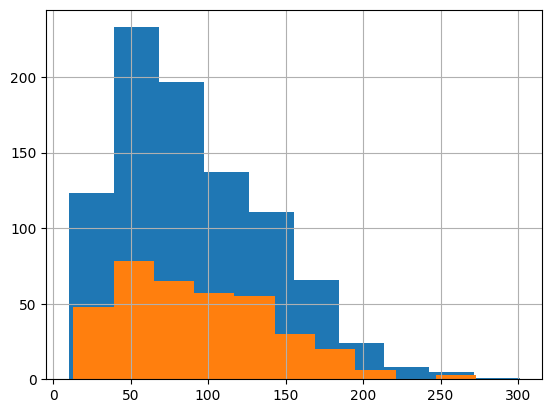

In [30]:
df_recent.groupby('is_weekend').pm25.hist()

In [31]:
# Search for around specific dates
df_recent[(df_recent.date > '2021-02-10') & (df_recent.date < '2021-02-15')]

,date,pm25,pm10,o3,no2,so2,co,day_of_week,is_weekend
848,2021-02-11,169.0,100.0,35.0,25.0,4.0,17.0,3,False
849,2021-02-12,239.0,139.0,50.0,17.0,5.0,15.0,4,False
850,2021-02-13,273.0,132.0,13.0,21.0,2.0,22.0,5,True
851,2021-02-14,259.0,133.0,35.0,12.0,NaN,13.0,6,True


In [32]:
df_recent.sort_values(by = 'pm25', ascending = False).head(50)

,date,pm25,pm10,o3,no2,so2,co,day_of_week,is_weekend
881,2021-03-16,301.0,142.0,29.0,10.0,NaN,3.0,1,False
850,2021-02-13,273.0,132.0,13.0,21.0,2.0,22.0,5,True
1219,2020-02-14,261.0,NaN,26.0,7.0,NaN,8.0,4,False
851,2021-02-14,259.0,133.0,35.0,12.0,NaN,13.0,6,True
1218,2020-02-13,253.0,NaN,17.0,27.0,1.0,21.0,3,False
1193,2020-01-19,251.0,58.0,28.0,10.0,1.0,4.0,6,True
1203,2020-01-29,245.0,38.0,33.0,16.0,5.0,11.0,2,False
1217,2020-02-12,244.0,NaN,50.0,27.0,2.0,22.0,2,False
160,2023-03-23,243.0,106.0,34.0,4.0,NaN,1.0,3,False
876,2021-03-11,242.0,66.0,43.0,23.0,1.0,7.0,3,False


In [34]:
# So no correlation between worst levels of pm2.5 vs. weekends and public holidays....although this could be an 
# interesting thing to follow up on in the future on the RELATION between each weekend and its surrounding days. 
df_recent[['pm25', 'is_weekend']].corr()

,pm25,is_weekend
pm25,1.000000,0.018681
is_weekend,0.018681,1.000000


In [21]:
# I opened up the air quality records for Huludao, a city with famously bad air quality...

In [46]:
df_huludao = pd.read_csv('huludao-air-quality.csv', na_values=' ', parse_dates=['date'])
df_huludao.columns = df_huludao.columns.str.strip()
df_huludao.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [47]:
df_huludao.head()

,date,pm25,pm10,o3,no2,so2,co
0,2023-06-02,130.0,34.0,53.0,10.0,9.0,2.0
1,2023-06-03,48.0,38.0,59.0,16.0,7.0,2.0
2,2023-06-04,59.0,46.0,97.0,16.0,14.0,4.0
3,2023-06-05,74.0,58.0,103.0,12.0,10.0,6.0
4,2023-06-06,135.0,46.0,85.0,8.0,10.0,4.0


In [48]:
df_huludao.sort_values(by = 'pm25', ascending = True)

,date,pm25,pm10,o3,no2,so2,co
1223,2019-10-05,27.0,69.0,28.0,14.0,19.0,5.0
697,2021-09-08,31.0,50.0,94.0,17.0,4.0,9.0
711,2021-09-22,31.0,26.0,40.0,15.0,5.0,7.0
186,2022-10-17,33.0,47.0,22.0,13.0,4.0,3.0
348,2022-09-24,35.0,46.0,42.0,17.0,7.0,6.0
...,...,...,...,...,...,...,...
3399,2017-09-11,NaN,49.0,39.0,16.0,33.0,11.0
3400,2017-01-02,NaN,267.0,35.0,47.0,92.0,45.0
3401,2016-01-04,NaN,103.0,33.0,31.0,63.0,34.0
3402,2015-01-01,NaN,61.0,17.0,18.0,48.0,25.0


In [54]:
df_nyc = pd.read_csv("new-york, usa-air-quality.csv",
                     skiprows=1,
                     na_values=' ',
                     parse_dates=['date'])
df_nyc.head()

,date,pm25,o3,no2,co
0,2023-06-02,62.0,72.0,25.0,4.0
1,2023-06-03,65.0,27.0,6.0,1.0
2,2023-06-04,52.0,26.0,3.0,1.0
3,2023-06-05,22.0,32.0,5.0,1.0
4,2023-06-06,37.0,43.0,10.0,4.0


In [63]:
df_nyc['city'] = 'NYC'
df_beijing['city'] = 'Beijing'
df_huludao['city'] = 'Huludao'

In [64]:
combined = pd.concat([
    df_nyc,
    df_beijing,
    df_huludao
], ignore_index=True)
combined.head()

,date,pm25,o3,no2,co,city,pm10,so2,co
0,2023-06-02,62.0,72.0,25.0,4.0,NYC,NaN,NaN,NaN
1,2023-06-03,65.0,27.0,6.0,1.0,NYC,NaN,NaN,NaN
2,2023-06-04,52.0,26.0,3.0,1.0,NYC,NaN,NaN,NaN
3,2023-06-05,22.0,32.0,5.0,1.0,NYC,NaN,NaN,NaN
4,2023-06-06,37.0,43.0,10.0,4.0,NYC,NaN,NaN,NaN


In [65]:
filtered = combined[['date', 'pm25', 'city']].copy()
filtered.head()

,date,pm25,city
0,2023-06-02,62.0,NYC
1,2023-06-03,65.0,NYC
2,2023-06-04,52.0,NYC
3,2023-06-05,22.0,NYC
4,2023-06-06,37.0,NYC


In [66]:
filtered.sort_values(by='pm25', ascending=False).head(10)

,date,pm25,city
8024,2020-01-26,532.0,Huludao
6222,2015-12-26,525.0,Beijing
6198,2015-12-02,488.0,Beijing
5865,2017-01-02,486.0,Beijing
6790,2014-01-17,466.0,Beijing
6830,2014-02-26,462.0,Beijing
5686,2017-01-05,437.0,Beijing
9268,2017-01-01,429.0,Huludao
6197,2015-12-01,421.0,Beijing
6831,2014-02-27,421.0,Beijing


In [70]:
filtered.groupby('city').pm25.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Beijing,3446.0,114.378990,64.686779,10.0,66.0,107.0,151.0,525.0
Huludao,3395.0,128.255670,48.658243,27.0,92.0,124.0,157.0,532.0
NYC,3407.0,42.141767,21.813094,4.0,27.0,39.0,51.0,247.0


city
Beijing    AxesSubplot(0.125,0.11;0.775x0.77)
Huludao    AxesSubplot(0.125,0.11;0.775x0.77)
NYC        AxesSubplot(0.125,0.11;0.775x0.77)
Name: pm25, dtype: object

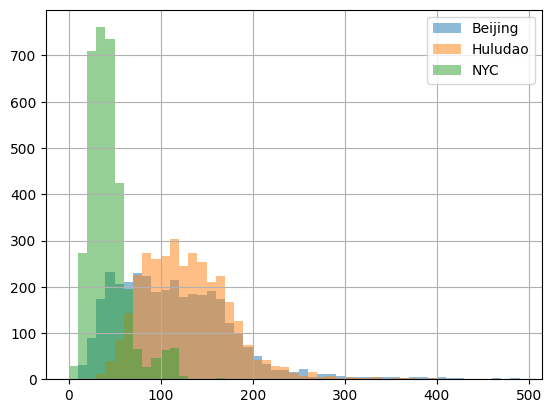

In [74]:
filtered.groupby('city').pm25.hist(alpha=0.5, bins=range(0, 500, 10), legend=True)

In [77]:
recent = combined[combined['date'] > '2020-01-01'].copy()
recent.head()

,date,pm25,o3,no2,co,city,pm10,so2,co
0,2023-06-02,62.0,72.0,25.0,4.0,NYC,NaN,NaN,NaN
1,2023-06-03,65.0,27.0,6.0,1.0,NYC,NaN,NaN,NaN
2,2023-06-04,52.0,26.0,3.0,1.0,NYC,NaN,NaN,NaN
3,2023-06-05,22.0,32.0,5.0,1.0,NYC,NaN,NaN,NaN
4,2023-06-06,37.0,43.0,10.0,4.0,NYC,NaN,NaN,NaN


In [79]:
filtered.groupby('city').pm25.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Beijing,3446.0,114.378990,64.686779,10.0,66.0,107.0,151.0,525.0
Huludao,3395.0,128.255670,48.658243,27.0,92.0,124.0,157.0,532.0
NYC,3407.0,42.141767,21.813094,4.0,27.0,39.0,51.0,247.0


In [67]:
pivoted = filtered.pivot(index='date', columns='city', values='pm25').reset_index()
pivoted.head()

city,date,Beijing,Huludao,NYC
0,2014-01-01,NaN,NaN,NaN
1,2014-01-02,125.0,142.0,57.0
2,2014-01-03,218.0,164.0,46.0
3,2014-01-04,127.0,151.0,55.0
4,2014-01-05,213.0,186.0,56.0


In [76]:
recent_pivoted = pivoted[pivoted['date'] > '2020-01-01'].copy()
recent_pivoted.head()

city,date,Beijing,Huludao,NYC
2186,2020-01-02,93.0,180.0,40.0
2187,2020-01-03,132.0,234.0,59.0
2188,2020-01-04,124.0,323.0,66.0
2189,2020-01-05,98.0,237.0,57.0
2190,2020-01-06,152.0,239.0,40.0
